In [91]:
#---------------
# analysis.py 
# Provides functions for analysis of
# the Redfield quantum master equation and its solution.
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

import json
import meta
import meta_functions
import numpy as np
from time import time
from pathlib import Path
import matplotlib.pyplot as plt

# call as "simulate([tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence])"
def simulate(args):
    start = time()
    
    # Parse input as float
    for j in range(len(args) - 1):
        args[j] = float(args[j])
    tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, LF_noise, CPU = args
    tQA = float('{:0.3e}'.format(tQA))
    args = [tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, LF_noise, CPU]
                
    decoherence = int(decoherence)
	# args for constructing F-model Hamiltonian
    H_args = [I, J, K, int(N)]

	# args pertaining to numerical implementation of the QME
    N_args = [int(Nc), [step, window_size, int(num_samples)]]
    svals, bad_svals, tvals = meta_functions.generate_discretization(tQA, H_args, N_args[1])[:3]

	# Check if JSON exists.
    prefix = 'tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, LF_noise, CPU = '+ str(args)
    simulation_filename = meta.SAVE_LOCATION + prefix + '.json'
    
#     print("Testing to see if JSON exists...")
    if not Path(simulation_filename).is_file():
		print ("The following file does not exist. To initialize the file, run generate.py:")
		print(simulation_filename)
    else:
#         print ("Downloading the simulation data in the following JSON...")
#         print(simulation_filename)
#         print("loading JSON...")
        simulation = json.loads(open(simulation_filename).read())
        print("Finished loading JSON. The simulation has {} time steps...".format(len(svals)
                ))
        
        # Preprocess the dict for numerical and graphical analysis:
        simulation['svals'] = np.array(simulation['svals'])
        simulation['linblad_real_part'] = np.array(simulation['linblad_real_part'])
        simulation['linblad_imaginary_part'] = np.array(simulation['linblad_imaginary_part'])
        simulation['rho_real_part'] = np.array(simulation['rho_real_part'])
        simulation['rho_imaginary_part'] = np.array(simulation['rho_imaginary_part'])
        simulation['eq_dist'] = np.array(simulation['eq_dist'])
        end = time()
        print("Process complete; simulation loaded in {} seconds.".format(end-start))
        
        return simulation
    
def plot_component(tensors, multi_index):
    if len(multi_index) == 4:
        i, j, k, l = multi_index
        return np.array([tensor[i, j, k, l] for tensor in tensors])
    elif len(multi_index) == 2:
        i, j = multi_index
        return np.array([tensor[i, j] for tensor in tensors])
    
def plot_trace(tensors):
    return np.array([sum(tensor[i, i] for i in range(len(tensor[0])) ) for tensor in tensors])

In [148]:
tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, LF_noise, CPU = [5*10**(-6), 0.2, 0.48, 1, 9, 6, 0.001, 10, 10000, 1, 1, "Home"]
args = [tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, LF_noise, CPU]
sim_N6 = simulate(args)

Finished loading JSON. The simulation has 1000 time steps...
Process complete; simulation loaded in 2.40945315361 seconds.


1000


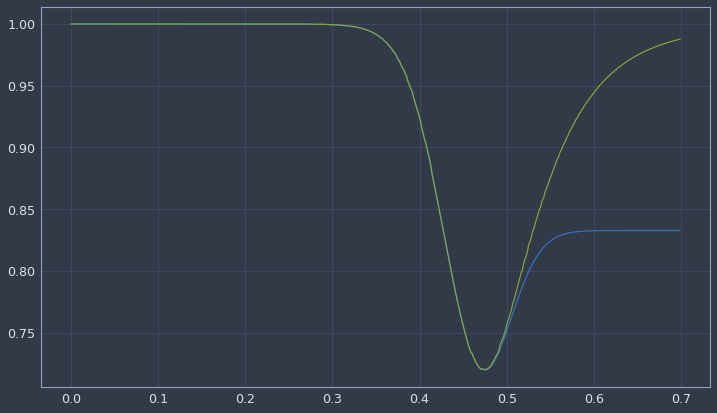

In [149]:
x = sim_N6['svals']
print(len(x))
y = plot_component(sim_N6['rho_real_part'], [0, 0]) + plot_component(sim_N6['rho_real_part'], [1, 1])
z = plot_component(sim_N6['eq_dist'], [0, 0]) + plot_component(sim_N6['eq_dist'], [1, 1])
z2 = plot_component(sim_N6['eq_dist'], [2, 2]) + plot_component(sim_N6['eq_dist'], [3, 3])


plt.figure(figsize=(12,7))
# plt.plot(x[5000:8000], y[5000:8000], x[5000:8000], z[5000:8000])
plt.plot(x[:-300],y[:-300],x[:-300],z[:-300])
plt.show()

In [9]:
tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU = [5*10**(-6), 0.2, 0.3, 1, 6, 6, 0.001, 10, 10000, 1, "Home"]
args = [tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU]
for j in range(len(args)-1):
    args[j] = float(args[j])
sim_N6 = simulate(args)

Finished loading JSON. The simulation has 10476 time steps...
Process complete; simulation loaded in 24.1514630318 seconds.


10476


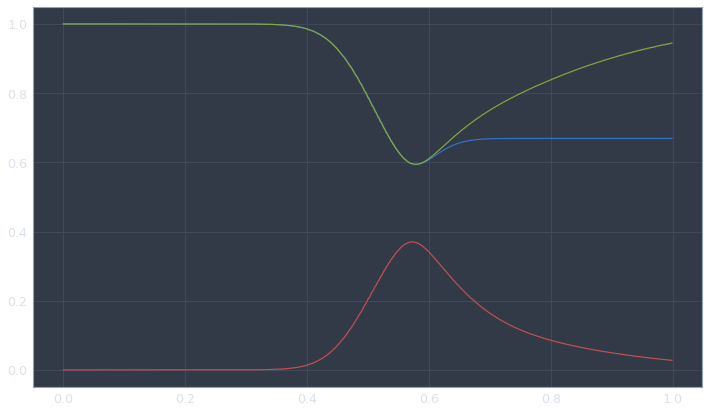

In [11]:
x = sim_N6['svals']
print(len(x))
y = time_series(sim_N6['rho_real_part'], [0, 0]) + time_series(sim_N6['rho_real_part'], [1, 1])
z = time_series(sim_N6['eq_dist'], [0, 0]) + time_series(sim_N6['eq_dist'], [1, 1])
z2 = time_series(sim_N6['eq_dist'], [2, 2]) + time_series(sim_N6['eq_dist'], [3, 3])


plt.figure(figsize=(12,7))
plt.plot(x, y, x, z, x, z2)
plt.show()

10476


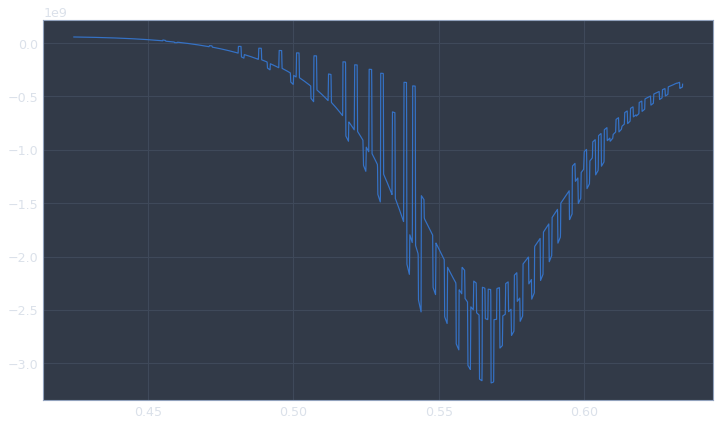

In [7]:
x = sim_N6['svals']
print(len(x))
y = time_series(sim_N6['linblad_real_part'], [1, 1, 1, 2])
# z = time_series(sim_N6['eq_dist'], [0, 0]) + time_series(sim_N6['eq_dist'], [1, 1])
# z2 = time_series(sim_N6['eq_dist'], [2, 2]) + time_series(sim_N6['eq_dist'], [3, 3])


plt.figure(figsize=(12,7))
plt.plot(x[3000:7000], y[3000:7000])#, x, z, x, z2)
plt.show()

In [90]:
tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU = [5*10**(-6), 0.2, 0.24, 1, 6, 4, 0.001, 10, 10000, 1, 1, "Home"]
args = [tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU]
for j in range(len(args)-1):
    args[j] = float(args[j])
sim_N7 = simulate(args)

ValueError: too many values to unpack

10792


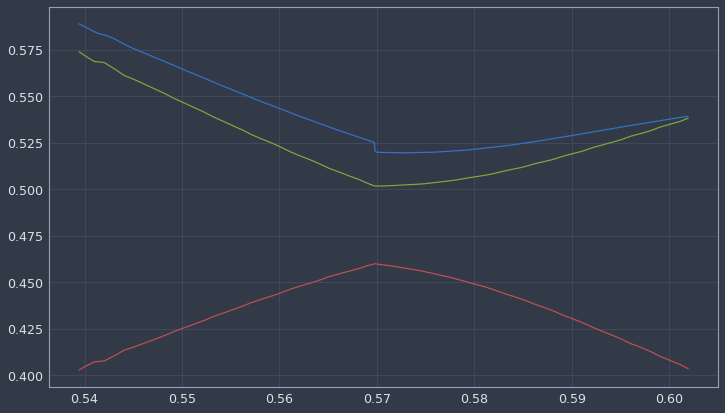

In [63]:
x = sim_N7['svals']
print(len(x))
y = time_series(sim_N7['rho_real_part'], [0, 0]) + time_series(sim_N7['rho_real_part'], [1, 1])
z = time_series(sim_N7['eq_dist'], [0, 0]) + time_series(sim_N7['eq_dist'], [1, 1])
z2 = time_series(sim_N7['eq_dist'], [2, 2]) + time_series(sim_N7['eq_dist'], [3, 3])


plt.figure(figsize=(12,7))
plt.plot(x[4000:7000], y[4000:7000], x[4000:7000], z[4000:7000], x[4000:7000], z2[4000:7000])
plt.show()

In [87]:
tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU = [5*10**(-6), 0.2, 0.24, 1, 6, 4, 0.001, 10, 10000, 1, "Home"]
args = [tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU]
for j in range(len(args)-1):
    args[j] = float(args[j])
sim_N9 = simulate(args)

ValueError: need more than 11 values to unpack

10958


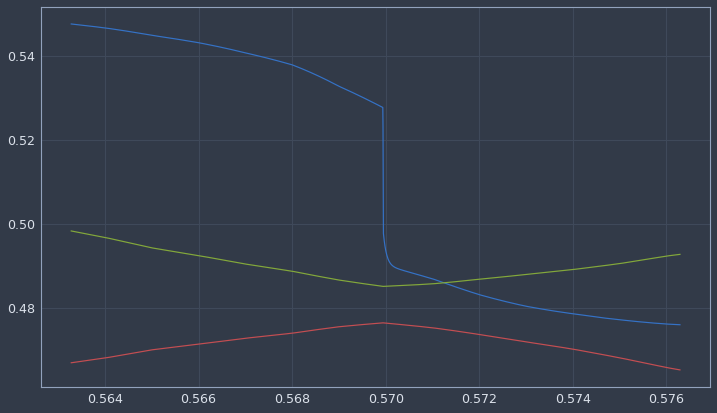

In [65]:
x = sim_N9['svals']
print(len(x))
y = time_series(sim_N9['rho_real_part'], [0, 0]) + time_series(sim_N9['rho_real_part'], [1, 1])
z = time_series(sim_N9['eq_dist'], [0, 0]) + time_series(sim_N9['eq_dist'], [1, 1])
z2 = time_series(sim_N9['eq_dist'], [2, 2]) + time_series(sim_N9['eq_dist'], [3, 3])


plt.figure(figsize=(12,7))
plt.plot(x[4000:7000], y[4000:7000], x[4000:7000], z[4000:7000], x[4000:7000], z2[4000:7000])
plt.show()

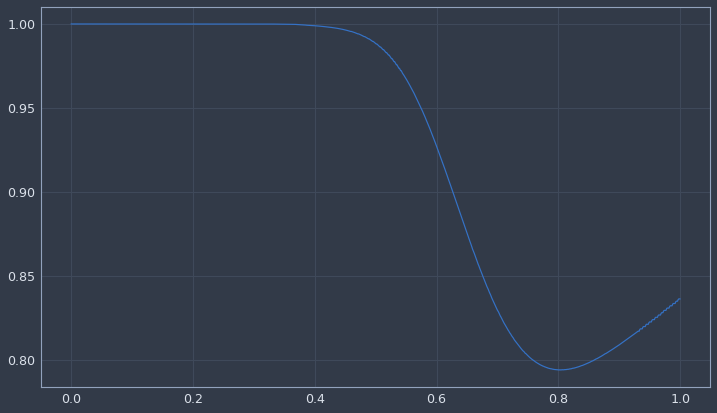

In [25]:
x = sim_N9['svals']
y = time_series(sim_N9['rho_real_part'], [0, 0]) + time_series(sim_N9['rho_real_part'], [1, 1]) + time_series(sim_N9['rho_real_part'], [2, 2]) + time_series(sim_N9['rho_real_part'], [3, 3])
plt.figure(figsize=(12,7))
plt.plot(x, z)
plt.show()

In [46]:
tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU = [5*10**(-6), 0.2, 0.3, 1, 5, 4, 0.001, 10, 10000, 1, "Home"]
args = [tQA, I, J, K, N, Nc, step, window_size, num_samples, decoherence, CPU]
for j in range(len(args)-1):
    args[j] = float(args[j])
sim_N5 = simulate(args)

Finished loading JSON. The simulation has 10045 time steps...
Process complete; simulation loaded in 4.45727205276 seconds.


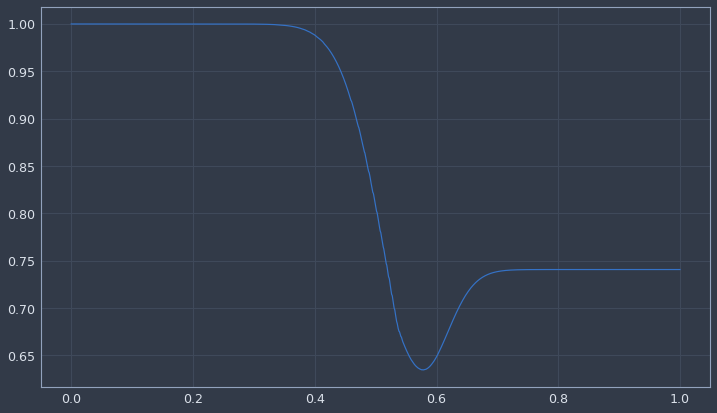

In [54]:
x = sim_N5['svals']
y = plot_component(sim_N5['rho_real_part'],[0,0])+plot_component(sim_N5['rho_real_part'],[1,1]) 
plt.figure(figsize=(12,7))
plt.plot(x, y)
plt.show()

In [50]:
len(sim_N5['rho_real_part'][0])

4

In [79]:
import meta_functions

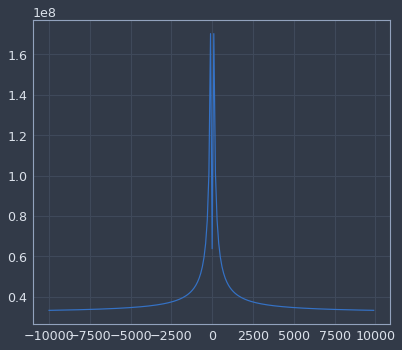

In [86]:
f = meta_functions.S(0.2,1)
x = np.arange(-10**4, 10**4,10**2)
y = map(f, x)
plt.plot(x,y)
plt.show()